In [1]:
import numpy as np
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
train=ds['train']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()

## Angle Degrees

In [37]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.9224326076008726
Mean: 24.358718314319734
Max: 89.98805846135882
STD: 34.120410293675114


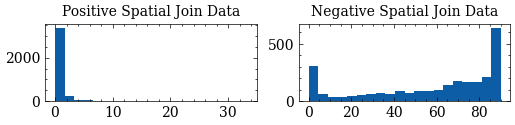

In [38]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel("")
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel("")
plt.savefig(f"../../misc/join_task_min_angle_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

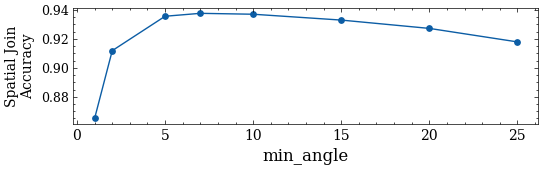

In [39]:
metrics=[1,2,5,7,10,15,20,25]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.yticks(fontsize=9)
plt.ylabel('Spatial Join\nAccuracy', fontsize=10)
plt.xlabel('min_angle', fontsize=12)
plt.savefig(f"../../misc/join_task_min_angle_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

---

## Euclidean Distance

In [40]:
name='euc_dist'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 6.884390860713215
Mean: 5.5110303100771985
Max: 9.997677095262258
STD: 3.606794913883234


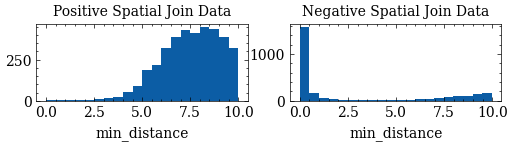

In [41]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel('min_distance')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel('min_distance')
plt.savefig(f"../../misc/join_task_min_distance_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

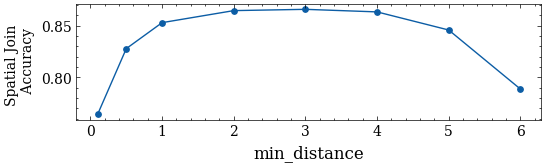

In [42]:
metrics=[0.1,0.5,1,2,3,4,5,6]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
plt.xlabel('min_distance', fontsize=12)
plt.savefig(f"../../misc/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    